In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os

import zipfile

from evarr import *

%matplotlib inline

In [64]:
m = 10000
n = 120

In [7]:
def test_compress(arr):
    snap = [arr]

    zszs = []

    for i in range(400):
        if i % 5 == 0:
            snap.append(arr)

        zszs.append(compressed_size(arr))
        arr = zoom(arr)
    
    return zszs, snap

In [9]:
def sample_minmax():
    szs = []

    min_sz = None
    min_arr = None

    max_sz = None
    max_arr = None

    for i in range(m):
        if i % 100 == 0:
            print(i)
        
        arr = np.round(np.random.random((n,n)))
        zs = zoomstack(arr, k = int(n / 2))
        sz = compressed_size(zs)
    
        szs.append(sz)
    
        if min_sz is None or sz < min_sz:
            min_sz = sz
            min_arr = arr

        if max_sz is None or sz > max_sz:
            max_sz = sz
            max_arr = arr

    return szs, min_arr, max_arr

#szs, min_arr, max_arr = sample_minmax()

In [65]:
def greedy():
    szs = []

    min_sz = None
    min_arr = None

    max_sz = None
    max_arr = None
    
    arr = np.round(np.random.random((n,n)))
    sz = compressed_size(zoomstack(arr, k = int(n/2)))

    for i in range(m):
        if i % 100 == 0:
            print(i)
            
        idx = np.random.randint(0, n, size=2)
        
        arr2 = arr.copy()
        arr2[idx[0],idx[1]] = (arr2[idx[0],idx[1]] - 1)**2
        
        zs2 = zoomstack(arr2, k = int(n / 2))
        sz2 = compressed_size(zs2)
    
        szs.append(sz2)
    
        if min_sz is None or sz2 < min_sz:
            min_sz = sz2
            min_arr = arr2

        if max_sz is None or sz2 > max_sz:
            max_sz = sz
            max_arr = arr
            arr = arr2
            sz = sz2
            
    return szs, min_arr, max_arr

szs, min_arr, max_arr = greedy()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


(array([ 391.,  426.,  475.,  638.,  871., 1306.,  989., 1019., 1781.,
        2104.]),
 array([35018. , 36363.1, 37708.2, 39053.3, 40398.4, 41743.5, 43088.6,
        44433.7, 45778.8, 47123.9, 48469. ]),
 <a list of 10 Patch objects>)

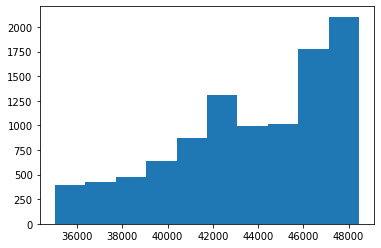

In [66]:
plt.hist(szs)

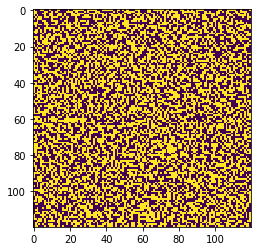

In [75]:
plt.imshow(max_arr)

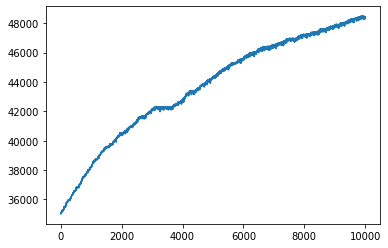

In [68]:
plt.plot(szs)

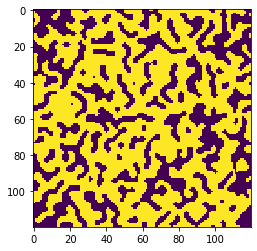

In [71]:
plt.imshow(zoom(zoom(zoom(zoom(zoom(zoom(max_arr)))))))

In [43]:
compressed_size(np.zeros((n,n,n)))

1206

In [44]:
compressed_size(np.round(np.random.random((n,n,n))))

37762

In [9]:
rarr = np.zeros((n,n))
for i in range(n):
    if i % 2 == 0:
        rarr[:,i] = 1

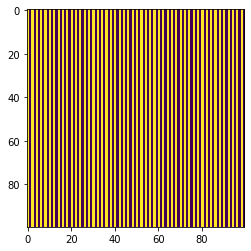

In [10]:
plt.imshow(rarr)

In [11]:
compressed_size(rarr)

400

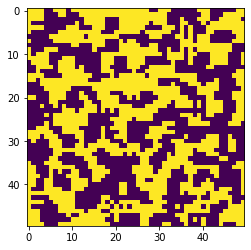

In [45]:
plt.imshow(zoom(max_arr))

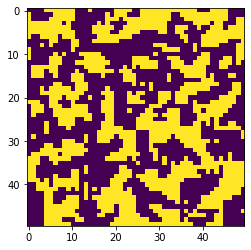

In [46]:
plt.imshow(zoom(min_arr))